# import labiraries

In [44]:
import numpy as np 
import pandas as pd 

# # import Dataset

In [45]:
dataset = pd.read_csv("weatherAUS.csv")
X = dataset.iloc[:,[1,2,3,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
Y = dataset.iloc[:,-1].values
print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 nan ... 15.0 20.9 'No']]


# Changing y into 2d array for input

In [46]:
Y = Y.reshape(-1,1) 

In [47]:
print(Y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 [nan]]


# data processing

In [48]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y)

In [49]:
 print(X)

[['Albury' 13.4 22.9 ... 16.9 21.8 'No']
 ['Albury' 7.4 25.1 ... 17.2 24.3 'No']
 ['Albury' 12.9 25.7 ... 21.0 23.2 'No']
 ...
 ['Uluru' 5.4 26.9 ... 12.5 26.1 'No']
 ['Uluru' 7.8 27.0 ... 15.1 26.0 'No']
 ['Uluru' 14.9 20.0 ... 15.0 20.9 'No']]


In [50]:
print(Y)

[['No']
 ['No']
 ['No']
 ...
 ['No']
 ['No']
 ['No']]


# encoding dataset

In [51]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
X[:,0] = le1.fit_transform(X[:,0])
le2 = LabelEncoder()
X[:,4] = le2.fit_transform(X[:,4])
le3 = LabelEncoder()
X[:,6] = le3.fit_transform(X[:,6])
le4 = LabelEncoder()
X[:,7] = le4.fit_transform(X[:,7])
le5 = LabelEncoder()
X[:,-1] = le5.fit_transform(X[:,-1])
le6 = LabelEncoder()
Y[:,-1] = le6.fit_transform(Y[:,-1])


In [52]:
print(X)

[[2 13.4 22.9 ... 16.9 21.8 0]
 [2 7.4 25.1 ... 17.2 24.3 0]
 [2 12.9 25.7 ... 21.0 23.2 0]
 ...
 [41 5.4 26.9 ... 12.5 26.1 0]
 [41 7.8 27.0 ... 15.1 26.0 0]
 [41 14.9 20.0 ... 15.0 20.9 0]]


In [53]:
print(Y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


# feature scaling

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [55]:
print(X)

[[-1.53166617  0.19132753 -0.04135977 ... -0.01407077  0.02310362
  -0.52979545]
 [-1.53166617 -0.75105231  0.26874452 ...  0.03244663  0.387799
  -0.52979545]
 [-1.53166617  0.11279588  0.35331842 ...  0.62166712  0.22733303
  -0.52979545]
 ...
 [ 1.20928479 -1.06517892  0.52246622 ... -0.69632607  0.65037966
  -0.52979545]
 [ 1.20928479 -0.68822699  0.53656187 ... -0.29317521  0.63579185
  -0.52979545]
 [ 1.20928479  0.42692249 -0.45013361 ... -0.30868102 -0.10818671
  -0.52979545]]


# train_test_split

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [57]:
print(X_train)

[[ 0.22535368  1.03946939  0.07140543 ...  0.68369032  0.08145488
  -0.52979545]
 [ 1.42012717 -0.45263203  0.11369237 ... -0.41722163  0.22733303
  -0.52979545]
 [ 0.50647685 -0.20133073 -0.14002932 ... -0.06058818 -0.02065982
   1.88752093]
 ...
 [ 1.0687232   0.75675544  0.93124006 ...  1.10234698  1.07342629
  -0.52979545]
 [ 0.57675765 -0.04426743 -0.16822062 ...  0.01694083 -0.28324049
   1.88752093]
 [ 1.63096955 -0.0285611  -0.91529006 ... -0.35519842 -0.76463838
  -0.52979545]]


In [58]:
print(Y_train)

[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


# RANDOM FOREST CALSSIFIER Training Model

In [59]:
le_target = LabelEncoder()
Y_train = le_target.fit_transform(Y_train.ravel())  # Use ravel() to convert Y_train to a 1D array

le_target = LabelEncoder()
Y_test = le_target.fit_transform(Y_test.ravel())  # Use ravel() to convert Y_test to a 1D array

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200,random_state=0)
classifier.fit(X_train,Y_train)

classifier.score(X_train,Y_train)

0.9999398460057748

# Calculate and print the classifier's score on the training data

In [60]:
train_score = classifier.score(X_train, Y_train)
print(f'Training Accuracy: {train_score * 100:.2f}%')

Training Accuracy: 99.99%


# Calculate and print the classifier's score on the test data

In [61]:
test_score = classifier.score(X_test, Y_test)
print(f'Test Accuracy: {test_score * 100:.2f}%')

y_pred = le6.inverse_transform(np.array(classifier.predict(X_test),dtype=int))
Y_test = le6.inverse_transform(np.array(Y_test,dtype=int))

y_pred = y_pred.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)


df = np.concatenate((Y_test,y_pred),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

Test Accuracy: 85.39%


In [62]:
print(dataframe)

      Rain on Tommorrow Predition of Rain
0                   Yes                No
1                   Yes                No
2                    No                No
3                    No               Yes
4                    No                No
...                 ...               ...
29087                No               Yes
29088                No                No
29089               Yes                No
29090                No                No
29091                No                No

[29092 rows x 2 columns]


In [63]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 85.39%


# CONFUSION MATRIX

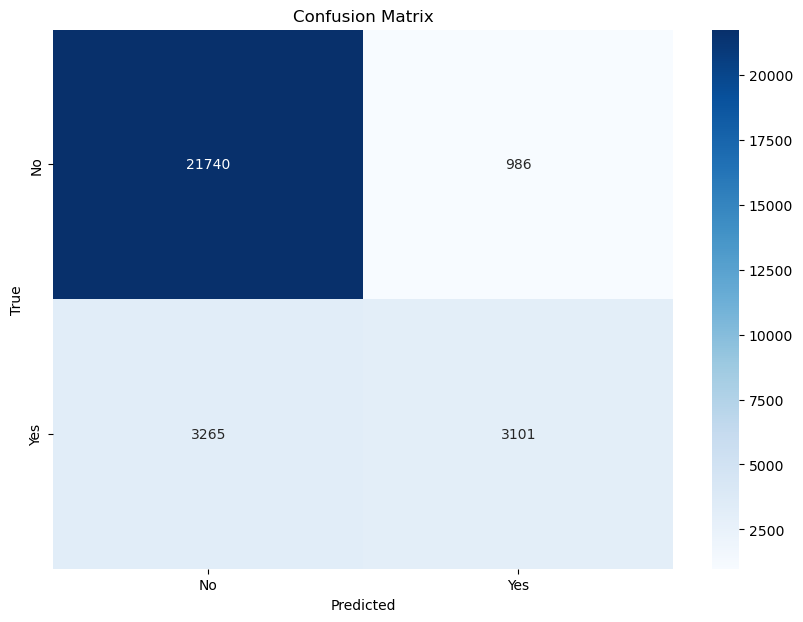

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le6.classes_, yticklabels=le6.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Graphical representation

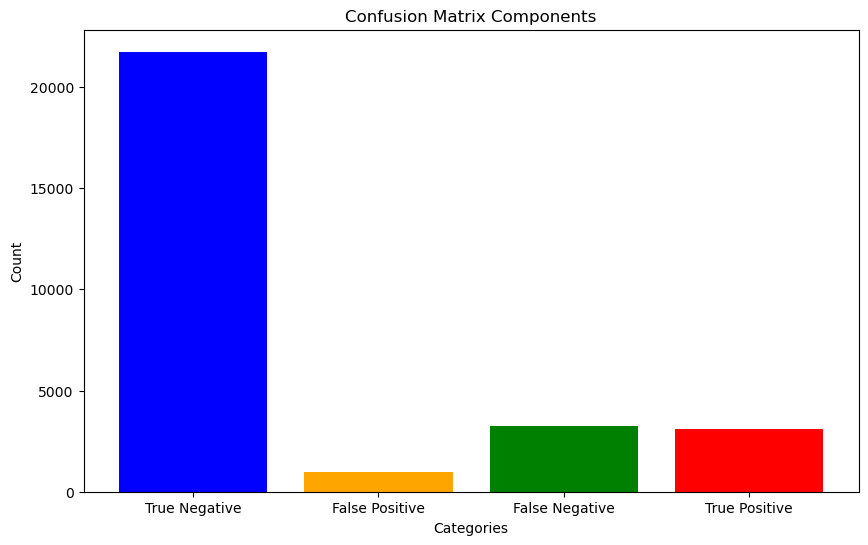

In [24]:
# Bar plot for confusion matrix components
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = [cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Confusion Matrix Components')
plt.show()

# HISTOGRAM GRAPH

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


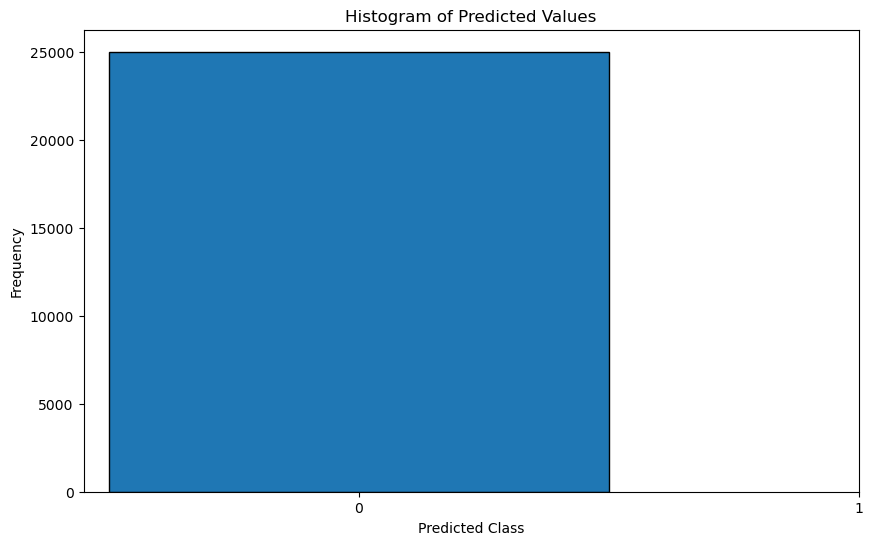

In [25]:
y_pred = le6.transform(y_pred)
# Plot histogram of the predictions
plt.figure(figsize=(10,6))
plt.hist(y_pred, bins=np.arange(y_pred.min(), y_pred.max() + 1) - 0.5, edgecolor='black')
plt.xticks(np.arange(y_pred.min(), y_pred.max() + 1))
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Values')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


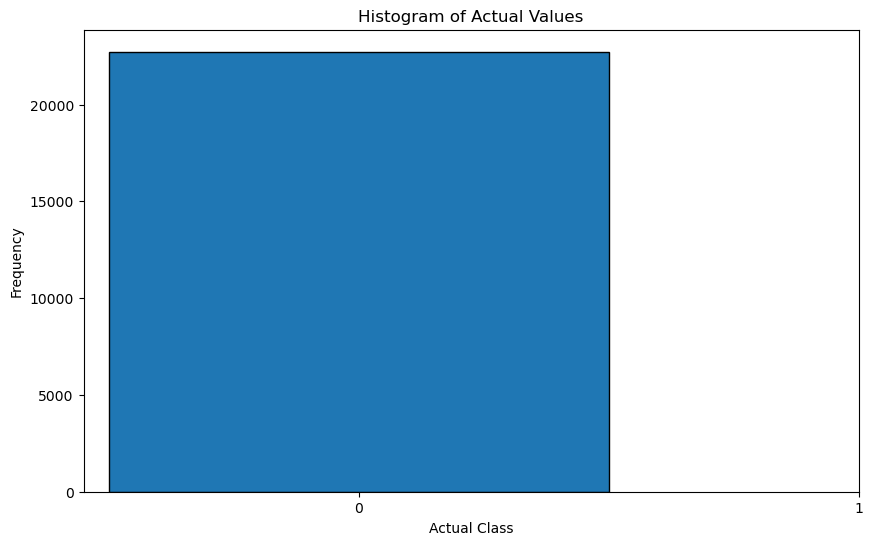

In [26]:
# Ensure Y_test is converted to integers
Y_test = le6.transform(Y_test)
# Plot histogram of the actual values
plt.figure(figsize=(10,6))
plt.hist(Y_test, bins=np.arange(Y_test.min(), Y_test.max() + 1) - 0.5, edgecolor='black')
plt.xticks(np.arange(Y_test.min(), Y_test.max() + 1))
plt.xlabel('Actual Class')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Values')
plt.show()


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(Y_test, y_pred, target_names=le6.classes_))


              precision    recall  f1-score   support

          No       0.87      0.96      0.91     22726
         Yes       0.76      0.49      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.81      0.72      0.75     29092
weighted avg       0.85      0.85      0.84     29092



In [54]:
from sklearn.svm import SVC
from sklearn.utils.class_weight import compute_class_weight

# Train the SVM classifier (without class weights)
classifier = SVC(kernel='linear')  # Adjust kernel as needed
classifier.fit(X_train, Y_train.ravel())


SVC(kernel='linear')

In [56]:
test_score = classifier.score(X_test, Y_test)
print(f'Test Accuracy: {test_score * 100:.2f}%')

y_pred = le6.inverse_transform(np.array(classifier.predict(X_test),dtype=int))
Y_test = le6.inverse_transform(np.array(Y_test,dtype=int))

y_pred = y_pred.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)


df = np.concatenate((Y_test,y_pred),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])

Test Accuracy: 84.10%


In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(Y_test, y_pred, target_names=le6.classes_))

              precision    recall  f1-score   support

          No       0.86      0.96      0.90     22726
         Yes       0.74      0.43      0.54      6366

    accuracy                           0.84     29092
   macro avg       0.80      0.69      0.72     29092
weighted avg       0.83      0.84      0.82     29092



# LOGISTIC REGRESSION MODEL   

In [65]:
from sklearn.linear_model import LogisticRegression
# Train the Logistic Regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)


LogisticRegression(random_state=0)

In [66]:
# Training accuracy
training_accuracy = classifier.score(X_train, Y_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.8417262477657088


In [67]:
Y_test = le6.fit_transform(np.array(Y_test))
Y_test = le_target.fit_transform(Y_test.ravel())
# Testing accuracy (on unseen data)
testing_accuracy = classifier.score(X_test, Y_test)
print("Testing Accuracy:", testing_accuracy)


Testing Accuracy: 0.8428433933727485


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
print(Y_test);

[1 1 0 ... 1 0 0]


In [69]:
test_score = classifier.score(X_test, Y_test)
print(f'Test Accuracy: {test_score * 100:.2f}%')

y_pred = le6.inverse_transform(np.array(classifier.predict(X_test),dtype=int))
Y_test = le6.inverse_transform(np.array(Y_test,dtype=int))

y_pred = y_pred.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)


df = np.concatenate((Y_test,y_pred),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])


Test Accuracy: 84.28%


In [70]:
print(dataframe)

      Rain on Tommorrow Predition of Rain
0                   Yes                No
1                   Yes                No
2                    No                No
3                    No                No
4                    No                No
...                 ...               ...
29087                No               Yes
29088                No                No
29089               Yes               Yes
29090                No                No
29091                No                No

[29092 rows x 2 columns]


In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(Y_test, y_pred, target_names=le6.classes_))

              precision    recall  f1-score   support

          No       0.86      0.95      0.90     22726
         Yes       0.72      0.46      0.56      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092



# CONFUSION MATRIX

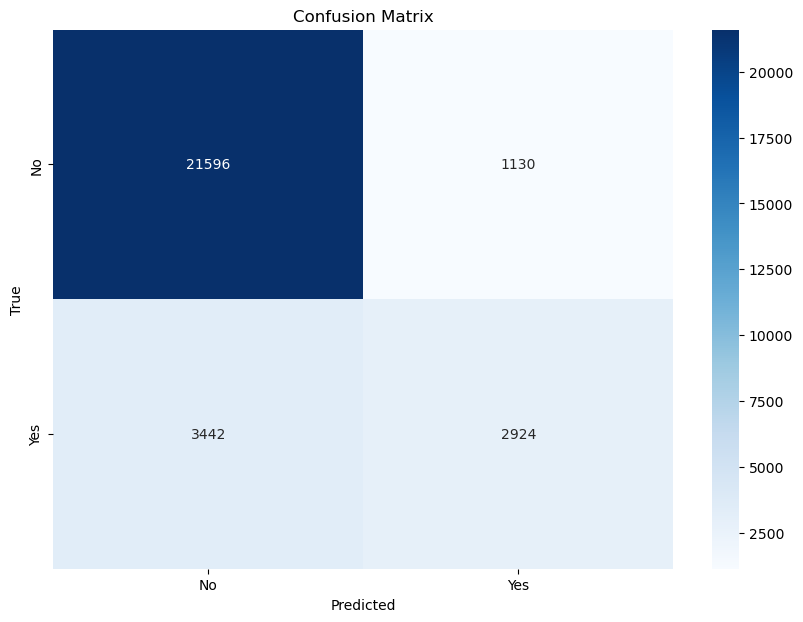

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le6.classes_, yticklabels=le6.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [69]:
# BAR DIAGRAM

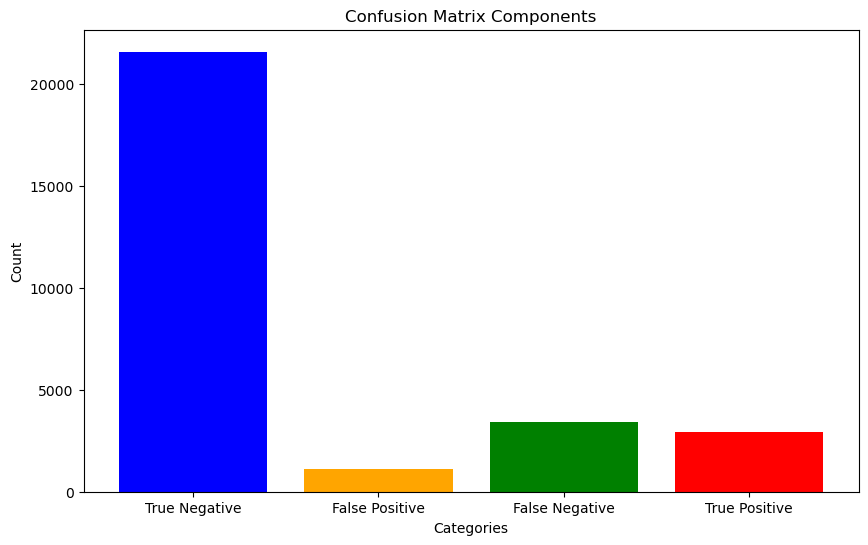

In [70]:
# Bar plot for confusion matrix components
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = [cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Confusion Matrix Components')
plt.show()

In [71]:
# Histogram Graph

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


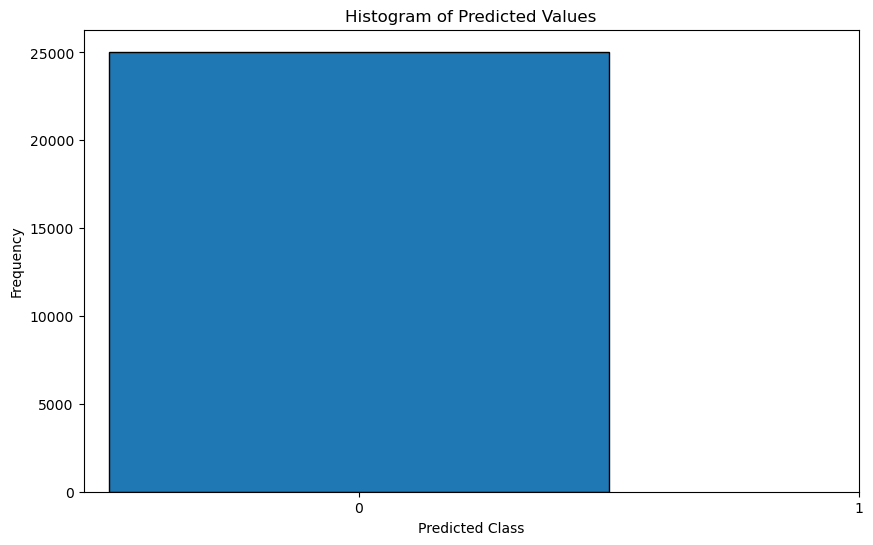

In [72]:
y_pred = le6.transform(y_pred)
# Plot histogram of the predictions
plt.figure(figsize=(10,6))
plt.hist(y_pred, bins=np.arange(y_pred.min(), y_pred.max() + 1) - 0.5, edgecolor='black')
plt.xticks(np.arange(y_pred.min(), y_pred.max() + 1))
plt.xlabel('Predicted Class')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Values')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


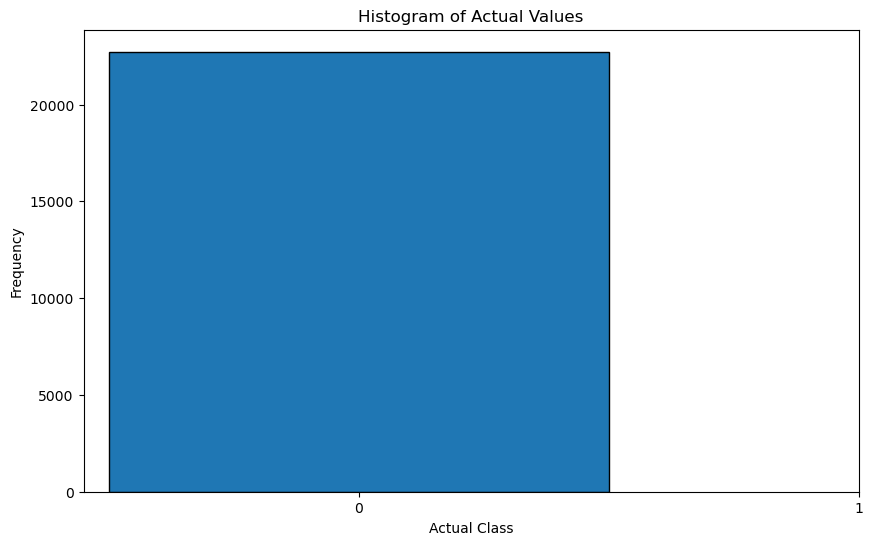

In [73]:
# Ensure Y_test is converted to integers
Y_test = le6.transform(Y_test)
# Plot histogram of the actual values
plt.figure(figsize=(10,6))
plt.hist(Y_test, bins=np.arange(Y_test.min(), Y_test.max() + 1) - 0.5, edgecolor='black')
plt.xticks(np.arange(Y_test.min(), Y_test.max() + 1))
plt.xlabel('Actual Class')
plt.ylabel('Frequency')
plt.title('Histogram of Actual Values')
plt.show()

# SUPPORT VECTOR MACHINE

In [72]:
from sklearn.svm import SVC

classifier = SVC(random_state=0)
classifier.fit(X_train, Y_train)


SVC(random_state=0)

In [73]:
# Training accuracy
training_accuracy = classifier.score(X_train, Y_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.857177230853843


In [74]:
Y_test = le6.fit_transform(np.array(Y_test))
Y_test = le_target.fit_transform(Y_test.ravel())
# Testing accuracy (on unseen data)
testing_accuracy = classifier.score(X_test, Y_test)
print("Testing Accuracy:", testing_accuracy)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Accuracy: 0.8489619139282277


In [75]:
test_score = classifier.score(X_test, Y_test)
print(f'Test Accuracy: {test_score * 100:.2f}%')

y_pred = le6.inverse_transform(np.array(classifier.predict(X_test),dtype=int))
Y_test = le6.inverse_transform(np.array(Y_test,dtype=int))

y_pred = y_pred.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)


df = np.concatenate((Y_test,y_pred),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])


Test Accuracy: 84.90%


In [76]:
print(dataframe)

      Rain on Tommorrow Predition of Rain
0                   Yes                No
1                   Yes                No
2                    No                No
3                    No                No
4                    No                No
...                 ...               ...
29087                No               Yes
29088                No                No
29089               Yes                No
29090                No                No
29091                No                No

[29092 rows x 2 columns]


In [78]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(Y_test, y_pred, target_names=le6.classes_))

              precision    recall  f1-score   support

          No       0.86      0.96      0.91     22726
         Yes       0.77      0.44      0.56      6366

    accuracy                           0.85     29092
   macro avg       0.81      0.70      0.74     29092
weighted avg       0.84      0.85      0.83     29092



# CONFUSION MATRIX

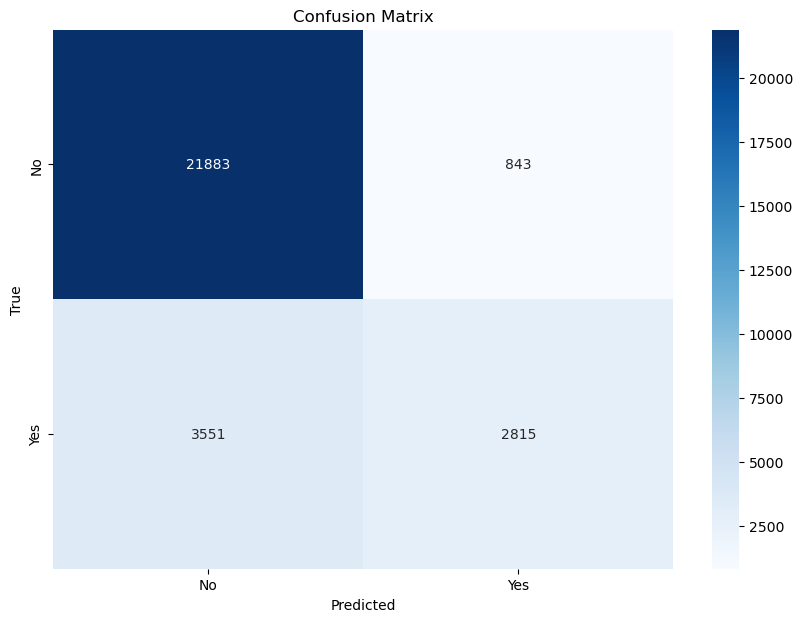

In [79]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le6.classes_, yticklabels=le6.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# BAR DIAGRAM

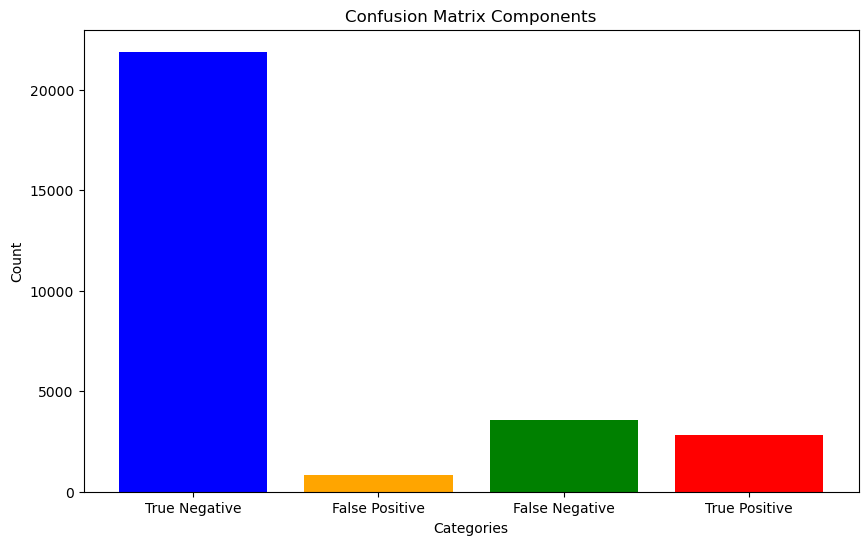

In [80]:
# Bar plot for confusion matrix components
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = [cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Confusion Matrix Components')
plt.show()

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(Y_test, y_pred, target_names=le6.classes_))

              precision    recall  f1-score   support

          No       0.86      0.96      0.91     22726
         Yes       0.77      0.44      0.56      6366

    accuracy                           0.85     29092
   macro avg       0.81      0.70      0.74     29092
weighted avg       0.84      0.85      0.83     29092



# KNN MODEL


In [82]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=18, metric='euclidean', algorithm='auto')
classifier.fit(X_train, Y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=18)

In [83]:
# Training accuracy
training_accuracy = classifier.score(X_train, Y_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.8537484531830056


In [84]:
Y_test = le6.fit_transform(np.array(Y_test))
Y_test = le_target.fit_transform(Y_test.ravel())
# Testing accuracy (on unseen data)
testing_accuracy = classifier.score(X_test, Y_test)
print("Testing Accuracy:", testing_accuracy)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Accuracy: 0.8410903341124708


In [85]:
test_score = classifier.score(X_test, Y_test)
print(f'Test Accuracy: {test_score * 100:.2f}%')

y_pred = le6.inverse_transform(np.array(classifier.predict(X_test),dtype=int))
Y_test = le6.inverse_transform(np.array(Y_test,dtype=int))

y_pred = y_pred.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)


df = np.concatenate((Y_test,y_pred),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])


Test Accuracy: 84.11%


In [86]:
print(dataframe)

      Rain on Tommorrow Predition of Rain
0                   Yes                No
1                   Yes                No
2                    No                No
3                    No                No
4                    No                No
...                 ...               ...
29087                No               Yes
29088                No                No
29089               Yes                No
29090                No                No
29091                No                No

[29092 rows x 2 columns]


In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(Y_test, y_pred, target_names=le6.classes_))

              precision    recall  f1-score   support

          No       0.85      0.96      0.90     22726
         Yes       0.75      0.41      0.53      6366

    accuracy                           0.84     29092
   macro avg       0.80      0.69      0.72     29092
weighted avg       0.83      0.84      0.82     29092



In [88]:
# CONFUSION MATRIX

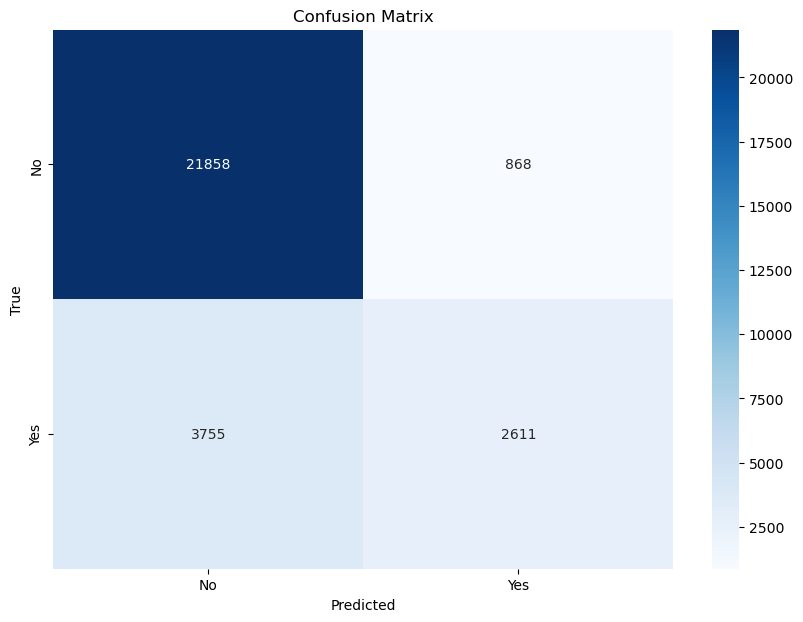

In [89]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le6.classes_, yticklabels=le6.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [90]:
# BAR DIAGRAM

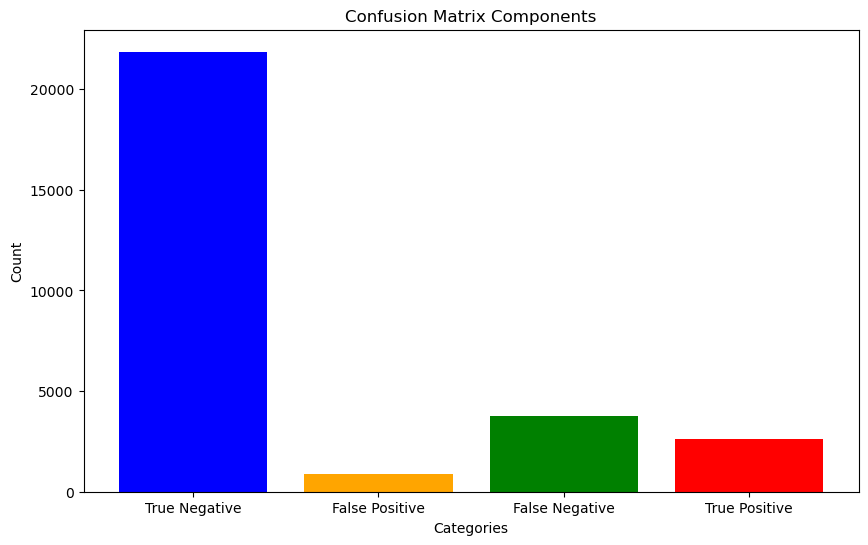

In [91]:
# Bar plot for confusion matrix components
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
counts = [cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]]

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Confusion Matrix Components')
plt.show()

In [92]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(Y_test, y_pred, target_names=le6.classes_))

              precision    recall  f1-score   support

          No       0.85      0.96      0.90     22726
         Yes       0.75      0.41      0.53      6366

    accuracy                           0.84     29092
   macro avg       0.80      0.69      0.72     29092
weighted avg       0.83      0.84      0.82     29092



In [93]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1,), random_state=1)
classifier.fit(X_train, Y_train)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(1,), random_state=1,
              solver='lbfgs')

In [94]:
# Training accuracy
training_accuracy = classifier.score(X_train, Y_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.8419582703148631


In [95]:
Y_test = le6.fit_transform(np.array(Y_test))
Y_test = le_target.fit_transform(Y_test.ravel())
# Testing accuracy (on unseen data)
testing_accuracy = classifier.score(X_test, Y_test)
print("Testing Accuracy:", testing_accuracy)

Testing Accuracy: 0.8420184243090885


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
test_score = classifier.score(X_test, Y_test)
print(f'Test Accuracy: {test_score * 100:.2f}%')

y_pred = le6.inverse_transform(np.array(classifier.predict(X_test),dtype=int))
Y_test = le6.inverse_transform(np.array(Y_test,dtype=int))

y_pred = y_pred.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)


df = np.concatenate((Y_test,y_pred),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])


Test Accuracy: 84.20%


In [97]:
print(dataframe)

      Rain on Tommorrow Predition of Rain
0                   Yes                No
1                   Yes                No
2                    No                No
3                    No                No
4                    No                No
...                 ...               ...
29087                No               Yes
29088                No                No
29089               Yes               Yes
29090                No                No
29091                No                No

[29092 rows x 2 columns]


In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(Y_test, y_pred, target_names=le6.classes_))

              precision    recall  f1-score   support

          No       0.86      0.95      0.90     22726
         Yes       0.72      0.46      0.56      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.70      0.73     29092
weighted avg       0.83      0.84      0.83     29092



In [99]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, Y_train)


DecisionTreeClassifier(random_state=0)

In [100]:
# Training accuracy
training_accuracy = classifier.score(X_train, Y_train)
print("Training Accuracy:", training_accuracy)

Training Accuracy: 0.9999398460057748


In [101]:
Y_test = le6.fit_transform(np.array(Y_test))
Y_test = le_target.fit_transform(Y_test.ravel())
# Testing accuracy (on unseen data)
testing_accuracy = classifier.score(X_test, Y_test)
print("Testing Accuracy:", testing_accuracy)

Testing Accuracy: 0.7827237728585178


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
test_score = classifier.score(X_test, Y_test)
print(f'Test Accuracy: {test_score * 100:.2f}%')

y_pred = le6.inverse_transform(np.array(classifier.predict(X_test),dtype=int))
Y_test = le6.inverse_transform(np.array(Y_test,dtype=int))

y_pred = y_pred.reshape(-1,1)
Y_test = Y_test.reshape(-1,1)


df = np.concatenate((Y_test,y_pred),axis=1)
dataframe = pd.DataFrame(df,columns=['Rain on Tommorrow','Predition of Rain'])


Test Accuracy: 78.27%


In [103]:
print(dataframe)

      Rain on Tommorrow Predition of Rain
0                   Yes               Yes
1                   Yes               Yes
2                    No               Yes
3                    No                No
4                    No                No
...                 ...               ...
29087                No                No
29088                No                No
29089               Yes                No
29090                No                No
29091                No                No

[29092 rows x 2 columns]


In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(Y_test, y_pred, target_names=le6.classes_))

              precision    recall  f1-score   support

          No       0.86      0.86      0.86     22726
         Yes       0.50      0.52      0.51      6366

    accuracy                           0.78     29092
   macro avg       0.68      0.69      0.69     29092
weighted avg       0.79      0.78      0.78     29092

